In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.datasets import cifar10

import seaborn as sns

Загрузка Cifar10 Dataset

In [2]:
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

170500096/170498071 [==============================] - 88s 1us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


Датасет имеет следующий формат:<br>
50000 образцов 32 на 32 пикселя, каждый пиксель зашифорван RGB кодом<br>
Для применения его как обучающей выборки необходимо сначала отмасштабировать данные

In [3]:
xTrain = xTrain.astype('float32') / 255
xTest = xTest.astype('float32') / 255

Создадим нейросеть со следующей архитектурой:
<ul>
    <li>Входной слой: 32 x 32 x 3</li>
    <li>Свёрточный слой 1 (Convolution)</li>
    <li>Свёрточный слой 2</li>
    <li>Свёрточный слой 3</li>
    <li>Полносвязный слой: 10</li>
</ul>

In [4]:
model = keras.Sequential(
    [
        layers.InputLayer(input_shape=(32, 32, 3)),
        layers.Conv2D(32, 3, activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)), #Собирает свертку в один двумерный слой
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, 3, activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(), #Выпрямитель слоя
        layers.Dense(512, activation='relu'), #Полносвязный слой
        layers.Dropout(0.5), #Регуляризация слоя
        layers.Dense(10)
    ]
)
#Pooling - операция дискретитизации

In [5]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

In [6]:
history = model.fit(xTrain, yTrain, batch_size=128, epochs=10, verbose=1)
model.evaluate(xTest, yTest, batch_size=128, verbose=2)

Epoch 1/10
391/391 [==============================] - 28s 69ms/step - loss: 1.9170 - accuracy: 0.2791
Epoch 2/10
391/391 [==============================] - 27s 70ms/step - loss: 1.3105 - accuracy: 0.5274
Epoch 3/10
391/391 [==============================] - 27s 70ms/step - loss: 1.1508 - accuracy: 0.5882
Epoch 4/10
391/391 [==============================] - 27s 70ms/step - loss: 1.0046 - accuracy: 0.6485
Epoch 5/10
391/391 [==============================] - 27s 69ms/step - loss: 0.9149 - accuracy: 0.6785
Epoch 6/10
391/391 [==============================] - 27s 69ms/step - loss: 0.8426 - accuracy: 0.7057
Epoch 7/10
391/391 [==============================] - 27s 69ms/step - loss: 0.7776 - accuracy: 0.7284
Epoch 8/10
391/391 [==============================] - 27s 70ms/step - loss: 0.7239 - accuracy: 0.7438
Epoch 9/10
391/391 [==============================] - 27s 70ms/step - loss: 0.6856 - accuracy: 0.7616
Epoch 10/10
391/391 [==============================] - 27s 70ms/step - loss: 0.657

[0.8230314254760742, 0.7164000272750854]

<AxesSubplot:xlabel='Epoch', ylabel='Accuracy'>

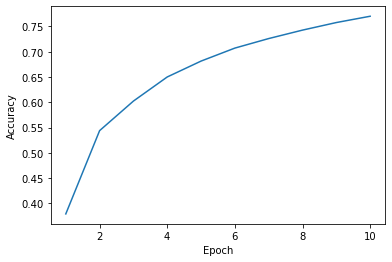

In [7]:
historyData = {}
historyData['Accuracy'] = history.history['accuracy']
historyData['Epoch'] = list(range(1, history.params['epochs'] + 1))
sns.lineplot(x="Epoch", y="Accuracy",
             data=historyData)

График роста точности в зависимости от эпохи